<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 3.1.3

## Data

The Philippine Statistics Authority (PSA) spearheads the conduct of the Family Income and Expenditure Survey (FIES) nationwide. The survey, which is undertaken every three (3) years, is aimed at providing data on family income and expenditure, including, among others, levels of consumption by item of expenditure, sources of income in cash, and related information affecting income and expenditure levels and patterns in the Philippines.

You can download the data from [here](https://www.kaggle.com/grosvenpaul/family-income-and-expenditure).

The purpose of today's lab is to use simulation to visualize the sampling distribution for the sample mean. The Central Limit Theorem (CLT) tells us that as our sample size gets larger, the sampling distribution of the sample mean converges to a normal distribution. Therefore, when we have a large sample size, we can say that the sampling distribution for the sample mean is approximately normal, regardless of the distribution from which we are sampling.

Let's start by taking a look at the data, **`Total Household Income`** will serve as a "population" for the purposes of this lab. 

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#import scipy.stats as stats

%matplotlib inline

In [8]:
# Read CSV
df = pd.read_csv("/Users/lawrenceyim/Documents/Institute of Data/Labs/EDA/data/PI_data.csv")

In [9]:
# Head
df.head()

,Total Household Income,Region,Total Food Expenditure,Main Source of Income,Agricultural Household indicator,Bread and Cereals Expenditure,Total Rice Expenditure,Meat Expenditure,Total Fish and marine products Expenditure,Fruit Expenditure,...,Number of Refrigerator/Freezer,Number of Washing Machine,Number of Airconditioner,"Number of Car, Jeep, Van",Number of Landline/wireless telephones,Number of Cellular phone,Number of Personal Computer,Number of Stove with Oven/Gas Range,Number of Motorized Banca,Number of Motorcycle/Tricycle
0,480332,CAR,117848,Wage/Salaries,0,42140,38300,24676,16806,3325,...,1,1,0,0,0,2,1,0,0,1
1,198235,CAR,67766,Wage/Salaries,0,17329,13008,17434,11073,2035,...,0,1,0,0,0,3,1,0,0,2
2,82785,CAR,61609,Wage/Salaries,1,34182,32001,7783,2590,1730,...,0,0,0,0,0,0,0,0,0,0
3,107589,CAR,78189,Wage/Salaries,0,34030,28659,10914,10812,690,...,0,0,0,0,0,1,0,0,0,0
4,189322,CAR,94625,Wage/Salaries,0,34820,30167,18391,11309,1395,...,1,0,0,0,0,3,0,0,0,1


In [10]:
# Tail
df.tail()

,Total Household Income,Region,Total Food Expenditure,Main Source of Income,Agricultural Household indicator,Bread and Cereals Expenditure,Total Rice Expenditure,Meat Expenditure,Total Fish and marine products Expenditure,Fruit Expenditure,...,Number of Refrigerator/Freezer,Number of Washing Machine,Number of Airconditioner,"Number of Car, Jeep, Van",Number of Landline/wireless telephones,Number of Cellular phone,Number of Personal Computer,Number of Stove with Oven/Gas Range,Number of Motorized Banca,Number of Motorcycle/Tricycle
41539,119773,XII - SOCCSKSARGEN,44875,Enterpreneurial Activities,1,23675,21542,1476,6120,1632,...,0,0,0,0,0,1,0,0,0,0
41540,137320,XII - SOCCSKSARGEN,31157,Enterpreneurial Activities,1,2691,1273,1886,4386,1840,...,0,0,0,0,0,3,0,0,0,0
41541,133171,XII - SOCCSKSARGEN,45882,Enterpreneurial Activities,2,28646,27339,480,4796,1232,...,0,0,0,0,0,1,0,0,0,0
41542,129500,XII - SOCCSKSARGEN,81416,Enterpreneurial Activities,1,29996,26655,2359,17730,2923,...,0,0,0,0,0,2,0,0,0,0
41543,128598,XII - SOCCSKSARGEN,78195,Enterpreneurial Activities,1,43485,41205,1985,7735,2062,...,0,0,0,0,0,1,0,0,0,0


In [11]:
# Shape
df.shape
#The format of shape would be (rows, columns).

(41544, 60)

In [12]:
# Data Types
df.dtypes

Total Household Income                            int64
Region                                           object
Total Food Expenditure                            int64
Main Source of Income                            object
Agricultural Household indicator                  int64
Bread and Cereals Expenditure                     int64
Total Rice Expenditure                            int64
Meat Expenditure                                  int64
Total Fish and  marine products Expenditure       int64
Fruit Expenditure                                 int64
Vegetables Expenditure                            int64
Restaurant and hotels Expenditure                 int64
Alcoholic Beverages Expenditure                   int64
Tobacco Expenditure                               int64
Clothing, Footwear and Other Wear Expenditure     int64
Housing and water Expenditure                     int64
Imputed House Rental Value                        int64
Medical Care Expenditure                        

#### Surveying the populations

##### 1. Create a histogram of `Total Household Income`.

array([[<AxesSubplot:title={'center':'Total Household Income'}>]],
      dtype=object)

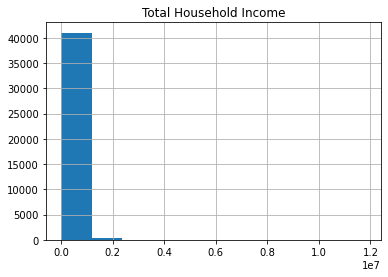

In [13]:
# ANSWER
df.hist(column='Total Household Income')

In [23]:
x = df['Total Household Income']
kurtosis_pandas = pd.DataFrame(x).kurtosis()[0]

print('kurtosis is: ' +str(kurtosis_pandas))

skew_pandas = pd.DataFrame(x).skew()[0]
print('skew is: ' +str(skew_pandas))

kurtosis is: 210.6350911207776
skew is: 8.896631047132981


##### 2. How would you describe the shape of this population?

**ANSWER:** 
1) as the kurtosis is very high, it means that the distribution is not very spread out

2) the skewness is more than +1, indicating high right skewness

##### 2. What is the mean income of this population?

In [14]:
# ANSWER
house_hold_csv['Total Household Income'].mean()

247555.58480165608

##### 3. What sampling statistic/point estimate would you use to estimate the mean of this population if you were given a random sample from the population?

**ANSWER:**

#### Simulated sampling (sample means)

Now, we'd like to get an idea of what happens when we take multiple random samples of size 5. 

Take 10 sample (size=5) from the entire population. Calculate means for each sample. Now make a histogram of all the sample means.

- Describe the shape of the histogram.
- What is the center of the distribution of sample means?

##### 4. Simulation with `sample_size=5`

Take 10 samples, but with a sample size of 5.

In [27]:
#drop all columns df
df_dropped = house_hold_csv.loc[:, house_hold_csv.columns.intersection(['Total Household Income'])]

In [47]:
df_dropped

,Total Household Income
0,480332
1,198235
2,82785
3,107589
4,189322
...,...
41539,119773
41540,137320
41541,133171
41542,129500


In [60]:
##USE THIS FUNCTION for CLT. https://stackoverflow.com/questions/53192277/how-do-we-apply-the-central-limit-theorem-using-python
# then another function to visualize the sample mean
sampleMeans = []
for _ in range(10):
    samples = df_dropped.sample(n=5)
    sampleMean = np.mean(samples)
    sampleMeans.append(sampleMean)

#Now you have a list of sample means to plot - should be normally distributed

print(sampleMeans)

[Total Household Income    271085.6
dtype: float64, Total Household Income    271908.8
dtype: float64, Total Household Income    288196.2
dtype: float64, Total Household Income    195575.2
dtype: float64, Total Household Income    244944.4
dtype: float64, Total Household Income    174024.8
dtype: float64, Total Household Income    294416.2
dtype: float64, Total Household Income    136910.0
dtype: float64, Total Household Income    363586.4
dtype: float64, Total Household Income    491113.4
dtype: float64]


###### 4.A Make a histogram of all the sample means

/Users/lawrenceyim/opt/anaconda3/envs/hdb_mini_1/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

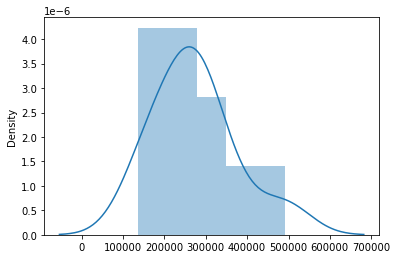

In [61]:
# ANSWER
sns.distplot(sampleMeans)

###### 4.B Describe the shape of the histogram.

**ANSWER:** The distribution is still right skewed, almost at 1. However, by taking the means we can see that the distribution is going closer to a normal distribution. 

In [62]:
x = sampleMeans
kurtosis_pandas = pd.DataFrame(x).kurtosis()[0]

print('kurtosis is: ' +str(kurtosis_pandas))

skew_pandas = pd.DataFrame(x).skew()[0]
print('skew is: ' +str(skew_pandas))

kurtosis is: 1.5666570271613347
skew is: 0.9619762914661745


##### 7. Simulation with `sample_size=15`

let's try taking another 1000 samples, but with a sample size of 15

/Users/lawrenceyim/opt/anaconda3/envs/hdb_mini_1/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

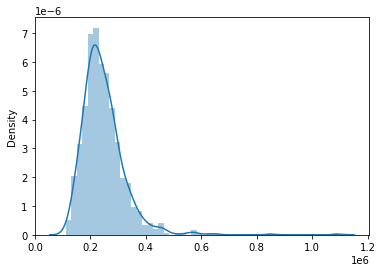

In [68]:
# ANSWER
sampleMeans15 = []
for _ in range(1000):
    samples = df_dropped.sample(n=15)
    sampleMean = np.mean(samples)
    sampleMeans15.append(sampleMean)

#Now you have a list of sample means to plot - should be normally distributed

#print(sampleMeans15)
sns.distplot(sampleMeans15)

##### 8. Simulation with `sample_size=50`

Let's try taking another 1000 samples, but with a sample size of 50

/Users/lawrenceyim/opt/anaconda3/envs/hdb_mini_1/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

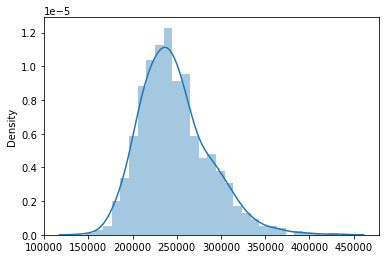

In [98]:
# ANSWER
sampleMeans50 = []
for _ in range(1000):
    samples = df_dropped.sample(n=50)
    sampleMean = np.mean(samples)
    sampleMeans50.append(sampleMean)

#Now you have a list of sample means to plot - should be normally distributed

#print(sampleMeans50)
sns.distplot(sampleMeans50)

In [99]:
x = sampleMeans50
kurtosis_pandas = pd.DataFrame(x).kurtosis()[0]

print('kurtosis is: ' +str(kurtosis_pandas))

skew_pandas = pd.DataFrame(x).skew()[0]
print('skew is: ' +str(skew_pandas))

kurtosis is: 0.9980634698178759
skew is: 0.7714468241947977


###### 8.A Describe the shape of the histogram of sample means (using sample size of 50)
1) It looks like even though there is still some right skew, the graph is getting closer to a normal distribution

###### 8.B What is mean of the distribution of sample means?

In [100]:
#Convert a List to Dataframe in Python then calculate mean
df_sampleMeans50 = pd.DataFrame(sampleMeans50,columns=['Total Household Income'])
print("population mean is: "+ str(df['Total Household Income'].mean()))
print("sample mean is: "+ str(df_sampleMeans50.mean()))
print('======================================================')

population mean is: 247555.58480165608
sample mean is: Total Household Income    247384.52036
dtype: float64


**ANSWER:**

> If repeated random samples of a given size n are taken from a population of values for a quantitative variable, where the population mean is μ (mu) and the population standard deviation is σ (sigma) then the mean of all sample means (x-bars) is population mean μ (mu).

###### 8.C As the sample size grew, did your results confirm the CLT?

**ANSWER:** Yes. because the distribution moving closer to a normal distribution as the sample size grows, and the number of experiments conducted.



---



---



> > > > > > > > > © 2021 Institute of Data


---



---



